# Noise with noise spectrum

nothing in particular

In [3]:
%reset -f
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.optimize import curve_fit
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.cm as cm
import scipy.integrate as integrate
from scipy import signal
%matplotlib notebook

# Constants
pi2 = 2*np.pi
pi = np.pi

# Set style of plots
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
# mpl.interactive(True)


mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

def sci_not(num,dec):
    exp = int(np.log10(num)+100)-100
    sci = (r"$%.10f"%(num/10**exp))[:dec+2+1*(dec>0)]+r"\cdot10^{%d}$"%exp
    return sci


<IPython.core.display.Javascript object>


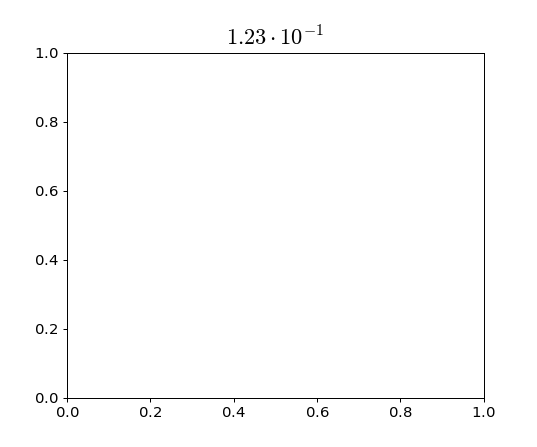

[-2. -1.  0.  1.]
[-2 -1  0  1]


In [4]:
int(1.9)
plt.figure()
plt.title(sci_not(.12345,2))
tall = [0.01,0.1,1,10]
print(np.log10(tall))
print(np.int32(np.log10(tall)))



# White noise FFT

0 0.8840225588603383
total energy 1020.9106129630547 1022.1300527821647
1 0.8785376423910062
total energy 1014.2870980878034 1014.4751721486568
2 0.8797513259506491
total energy 1007.405925082768 1008.73740302256
3 0.8811907716639699
total energy 1011.9442002920036 1012.5695089649064
4 0.8886218193979839
total energy 1024.109863955734 1024.137237208742
5 0.8863377223863074
total energy 1023.990416330174 1024.0050111237686
6 0.8863891588653968
total energy 1024.59963161855 1024.6112539472022
7 0.8892662737530935
total energy 1030.7654402355756 1030.7792787799706
8 0.8880376134475286
total energy 1028.967736537012 1028.9720639362345
9 0.8877040293850275
total energy 1027.5911433357487 1027.5983703712911
10 0.886949023431335
total energy 1025.9137227001272 1025.9194335081663


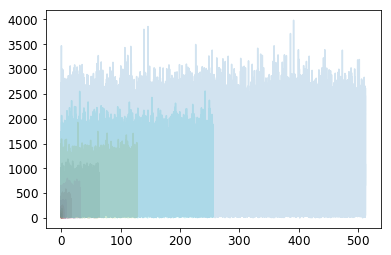

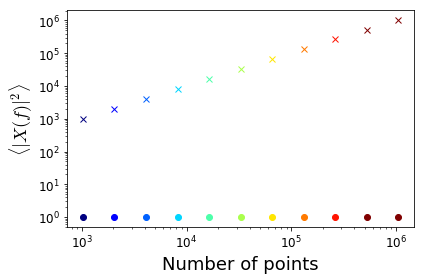

In [3]:
dt=1
pmax=10
N = int(1024*2**pmax)
x = np.random.normal(0,1,N)

fig1 = plt.figure()
ax1 = plt.gca()

fig2 = plt.figure()
ax2 = plt.gca()
for p in range(0,pmax+1):
    n = 1024*2**p
    dtp = dt/2**p
    fft1 = np.fft.rfft(x,n=n)
    fft2 = np.fft.rfft(x,n=n,norm="ortho")
    freq = np.fft.rfftfreq(n,dtp)
    
    ax1.plot(freq,np.abs(fft1),alpha=.2)
    ax2.loglog(n,np.mean(np.abs(fft1)**2),'x',c=cm.jet(p/(pmax-1)))
    ax2.loglog(n,np.mean(np.abs(fft2)**2),'o',c=cm.jet(p/(pmax-1)))
    
    print(p,np.mean(np.abs(fft2)))
    print("total energy",np.sum(x[:n]**2)*dtp,2*np.sum(np.abs(fft2)**2)/dtp *dtp**2)
    
ax2.set_xlabel("Number of points")
ax2.set_ylabel(r"$\langle |X(f)|^2\rangle$")
fig2.tight_layout()

## Spectrum of coherent particle

0.5


<Figure size 432x288 with 0 Axes>

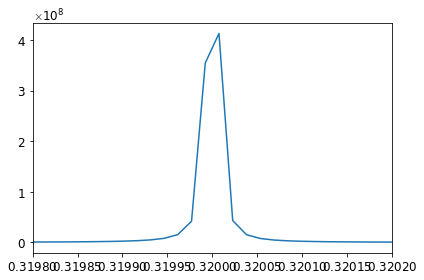

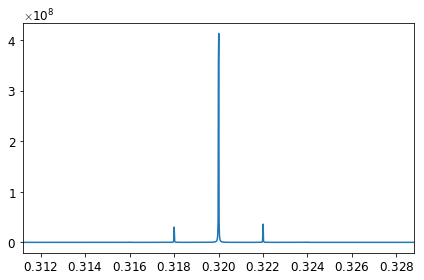

In [332]:
Nt = 1024*64
Qp = 1
Qs = 0.002
Qx = 0.32
pi2 = 2*np.pi
t = np.arange(Nt)

A_delta = 1e-3
delta    = np.cos(pi2*Qs*t)*A_delta
intdelta = np.sin(pi2*Qs*t)*A_delta/(pi2*Qs)

print(Qp*A_delta/Qs)

x = np.cos(pi2*(Qx*t+np.cumsum(Qp*delta)))
x = np.cos(pi2*(Qx*t+Qp*intdelta))
# x = np.cos(pi2*Qx*t) - np.sin(pi2*Qx*t)*pi2*Qp*intdelta

plt.figure()
# plt.plot(t,x)

fft = np.fft.rfft(x)
freq=np.fft.rfftfreq(Nt,d=1)

for fac in [0.0002,4.4*Qs]:
    plt.figure()
    plt.plot(freq,np.abs(fft)**2)
    plt.xlim(Qx-fac,Qx+fac)
    plt.tight_layout()
#     plt.ylim(0,1e6)

### Difference between numpy.fft and scipy.fftpack

In [5]:
import numpy as np
from scipy import signal
Nt = 1024*2
x = np.random.normal(0,1,Nt)
f1 = np.fft.rfft(x,norm='ortho')
ff,PSD1 = signal.welch(x,fs=1,scaling='density')
print("OBS: Welch is normalized wrong, PSD must be divided by 2 -maybe not...: %.2e , %.2e"%(
        np.mean(np.abs(f1)**2),np.sum(PSD1)*(ff[1]-ff[0])))

f1 = np.fft.rfft(x)
f2 = sc.fftpack.rfft(x)
print('Different normalization by rfft by a factor sqrt(2): %.2e , %.2e'%(
        np.mean(np.abs(f1)**2),np.mean(np.abs(f2**2))))
x1 = np.fft.irfft(f1)
x2 = sc.fftpack.irfft(f2)
print(np.mean(x1**2),np.mean(x2**2),np.mean(x**2))
f3 = np.fft.fft(x)
f4 = sc.fftpack.fft(x)
print('Same normalization by fft',np.mean(np.abs(f3)**2),np.mean(np.abs(f4**2)))


OBS: Welch is normalized wrong, PSD must be divided by 2 -maybe not...: 9.88e-01 , 9.88e-01
Different normalization by rfft by a factor sqrt(2): 2.02e+03 , 1.01e+03
0.9880437237434601 0.9880437237434602 0.9880437237434601
Same normalization by fft 2023.5135462266062 2023.5135462266066


PSD: 0.10800927323189996 0.011887484146373055 9.08596570156977
0.0010786010860871099 1.0048242354199242


/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


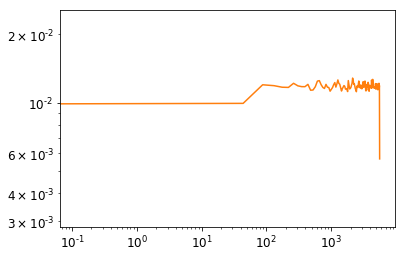

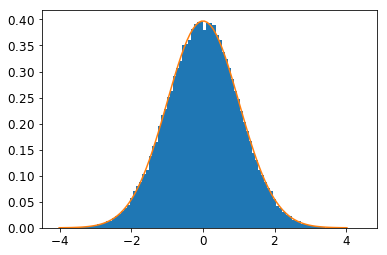

In [6]:

N=int(1e5)
dt=1/11245
#Gaussian noise
mean = 0
std = 1
x = np.random.normal(mean,std,int(N))
fftx = np.fft.rfft(x,norm ="ortho")
freq = np.fft.rfftfreq(N,dt)
fftx = fftx/(freq+1)**.5

x2 = np.fft.irfft(fftx)
x3 = (x2-np.mean(x2))*std/np.std(x2)

# f,PSD = signal.periodogram(x)
for xi in [x,x2,x3][:1]:
    f,PSD = signal.welch(xi,1/(dt*1),scaling = 'spectrum')
    plt.figure()
    xfft = np.fft.rfft(xi,norm="ortho")
    PSD2 = np.abs(xfft)**2* (dt)   *2 # *2 because of difference between np.fft and sc.fftpack...
    plt.loglog(freq,PSD2)
    plt.loglog(f,PSD)
    print('PSD:',np.mean(PSD**.5),np.mean(PSD2**.5),np.mean(PSD**.5)/np.mean(PSD2**.5))
    plt.ylim(np.min(PSD[1:])/2,np.max(PSD[1:])*2)
    
    plt.figure()
    plt.hist(xi,bins=100,normed=True)
    meani = np.mean(xi)
    stdi = np.std(xi)
    print(meani,stdi)
    temp = np.linspace(-4*stdi+meani,meani+4*stdi,100)
    plt.plot(temp,1/np.sqrt(2*np.pi*stdi**2)*np.exp(-.5*(temp-meani)**2/stdi**2))
    

In [16]:
"""
Power spectral density is DTFT of covariance function
"""


SyntaxError: invalid syntax (<ipython-input-16-6e79e3bf7895>, line 1)

# Harmonic noise a la Bazzani

0.045 1.9477874452256718
(16384,) (8193,)
Welch factor 2? 0.4981936363239866 0.9948715638941404 0.996379976704077 0.9666923571741723 0.4925379708448773


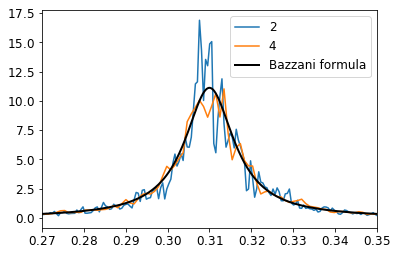

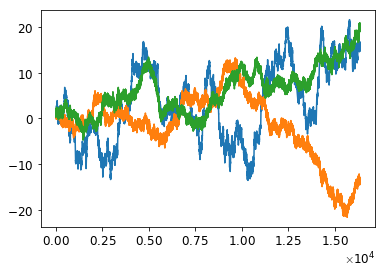

In [4]:
Nt = int(1024*2**4)
Q = 0.31
w0 = pi2*Q
sigma_w=3e-1
gamma = sigma_w**2/2
dt=1

print(gamma,w0)
def stochastic_rotator(f):
    return .5*gamma*(1/(gamma**2 + (w0+pi2*f)**2)+1/(gamma**2 + (w0-pi2*f)**2))*1


#Stochastic rotator
noise = np.random.normal(0,sigma_w,Nt)
w = np.cumsum(noise)
t = np.arange(Nt)*dt
xt = np.cos(w0*t + w)
# xf = sc.fftpack.rfft(xt)/np.sqrt(Nt)
# ff1 = sc.fftpack.rfftfreq(Nt,d=dt)
xf = np.fft.rfft(xt,norm='ortho')
ff1 = np.fft.rfftfreq(Nt,d=dt)
print(xt.shape,ff1.shape)
PSD1= np.abs(xf)**2 
ff2,PSD2 = signal.welch(xt,fs=1/dt,nperseg=1024*2**1) 
ff3,PSD3 = signal.periodogram(xt,fs=1/dt)

# Sondre noise
noise = np.random.normal(0,1,Nt)
xf = np.fft.rfft(noise,norm='ortho')
ff4 = np.fft.rfftfreq(Nt,dt)
xf_mod = xf * stochastic_rotator(ff4)**0.5
xt4 = np.fft.irfft(xf_mod,norm='ortho')
ff4,PSD4 = signal.welch(xt4,fs=1/dt,nperseg=1024,scaling='density')

plt.figure()
# plt.plot(ff1,PSD1,label=1)
plt.plot(ff2,PSD2/2,label=2)
# plt.plot(ff3,PSD3,label=3)
plt.plot(ff4,PSD4 /2,label=4)
print('Welch factor 2?',np.mean(PSD1),np.mean(PSD2), np.mean(PSD3),np.mean(PSD4),np.mean(stochastic_rotator(ff1)))



plt.plot(ff3,stochastic_rotator(ff3),'k',lw=2,label='Bazzani formula')
df=0.04
plt.xlim(Q-df,Q+df)
plt.legend(loc=0)

plt.figure()
plt.plot(t,w)
plt.plot(t,np.cumsum(xt))
plt.plot(t,np.cumsum(xt4))



# SDSHO noise a la Sondre

In [5]:
np.random.randn(1)
print(np.sqrt(1))

1.0


In [10]:
Nt = int(1024*2**7)
Q = 0.31
w0 = pi2*Q
sigma_w=3e-1
gamma = sigma_w**2/2

gamma =ImQ = -2e-3
g = -gamma*2 *pi2
sigma_n=1e-2
t = np.arange(Nt)
dt=1

def SDSHO_noise(xn,pn,delta,ReQ,ImQ):
    pn += np.random.randn(1) * delta
    pn += pn*(ImQ*2*pi2) # ImOmega=2pi*ImQ=g/2
    temp= xn
    xn  = np.cos(pi2*ReQ)*xn   + np.sin(pi2*ReQ)*pn
    pn  =-np.sin(pi2*ReQ)*temp + np.cos(pi2*ReQ)*pn
    return xn,pn

xn = 0
pn = 0

ROT = [[np.cos(w0),np.sin(w0)],[-np.sin(w0),np.cos(w0)]]

Xt = np.zeros((Nt,2))
Xt[0]=[xn,pn]

for i in range(1,Nt):
    Xt[i] = SDSHO_noise(Xt[i-1,0],Xt[i-1,1],sigma_n,Q,gamma)
#     Xt[i] = np.dot(ROT,Xt[i-1])
    if i<=2:
        print(Xt[i-1], Xt[i])
#     Xt[i,1] += np.random.randn(1)*sigma_n 
#     Xt[i,1] = Xt[i,1]*(1-g)

[0. 0.] [ 0.01161141 -0.00459728]
[ 0.01161141 -0.00459728] [-0.01170414 -0.00785439]


In [7]:
# Xt = np.zeros((Nt),dtype="complex")
# omega = pi2*(Q - 1j*gamma)
# for i in range(1,Nt):
#     Xt[i] = np.exp(-1j*(omega))*Xt[i-1]
#     Xt[i] += 1j*np.random.randn(1)*sigma_n 
# #     if i<10:
# #         print(Xt[i],1j*np.random.randn(1)*sigma_n ,np.exp(-1j*(omega))*Xt[i-1])
# Xt = np.array([np.real(Xt),np.imag(Xt)]).T

0.044603102903819275 0.04308451332935283


<IPython.core.display.Javascript object>


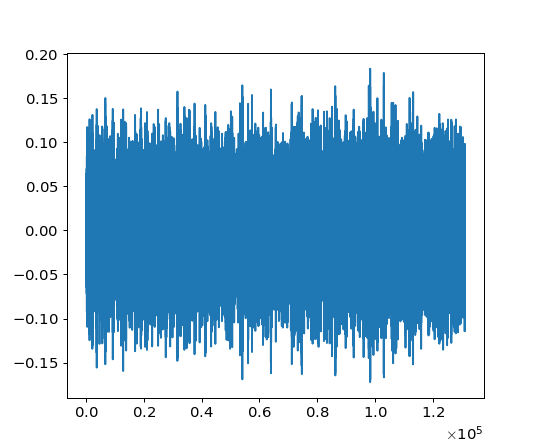

<IPython.core.display.Javascript object>


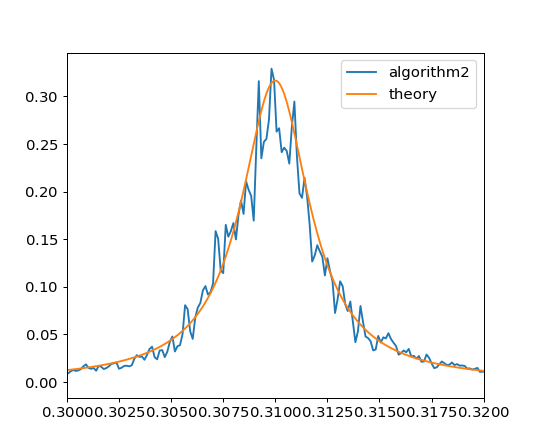

<IPython.core.display.Javascript object>


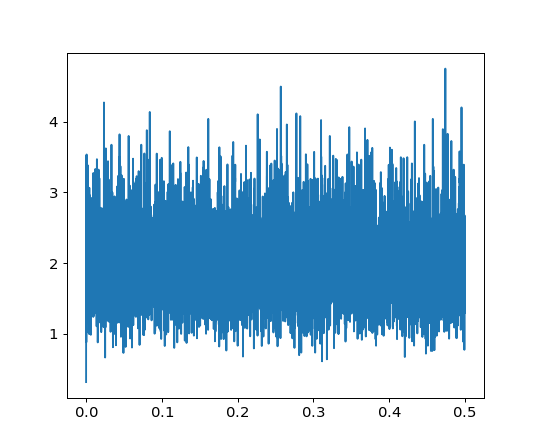

0.998458190401664 1.996767021519978
(0.31-0.002j) (0.096096-0.00124j) 0.0961


In [12]:
print(sigma_n*np.sqrt(.5/g),np.std(Xt[:,0]))

plt.figure()
plt.plot(t,Xt[:,0])

plt.figure()
fft = np.fft.rfft(Xt[:,0],norm='ortho')
PS1 = np.abs(fft)**2 * 2
freq1=np.fft.rfftfreq(Nt,d=1)

freq2,PS2 = signal.welch(Xt[:,0],fs=1,nperseg=1024*8,scaling='density')
# plt.plot(freq1,PS1,label='algorithm1')
plt.plot(freq2,PS2,label='algorithm2')


Qcom = Q+1j*gamma
plt.plot(freq1,np.abs(Qcom)**2*sigma_n**2/((freq1**2-np.real(Qcom**2))**2+np.imag(Qcom**2)**2)/pi2**2 * 2 ,label='theory')

plt.legend(loc=0)
fac=0.01
plt.xlim(Q-fac,Q+fac)


plt.figure()
RAND = np.random.randn(Nt)
f,P = signal.welch(RAND,fs=1,nperseg=1024*16,scaling='density')
plt.plot(f,P)
print(np.std(RAND),np.mean(P))
print(Qcom, Qcom**2,0.31**2)

# Low BW 

# Concept of reducing the ADT noise

I do N measurements, the error should fall like 1/N <br>
If I always to this, I should get 

In [4]:
# How often do particles pass?
tsep = 25e-9
fbunch= 1/tsep
print("Bunches are separated by %.2e s"%tsep)
print("That means the bunches come at a frequency of %.2e Hz"%fbunch)

freq_standard = 4e6
d_bpm = 217e-5 # Noise of each measurement
d_0 = 4.8e-5

#Accuracy ≈ 50 μm (adt) 
def noise_adt(highCutoff,fbunch=fbunch,G=1):
    # too simple method:
    N = 1+1*np.floor(fbunch/highCutoff).astype(np.int32)
    return d_bpm/np.sqrt(N)   *G

#     return np.abs(np.mean(np.random.normal(0,d_bpm,N)))
#     return np.sqrt(N*d_bpm**2/N)
noise_adt(1e6,1e6)

def integrate_log(func,a,b,N,args=(1)):
    if a<=0   : a=0.1
    if b>1e50 : b=1e50
    x = np.logspace(np.log10(a),np.log10(b),N)
    dx = np.diff(x)*0.5
    return np.sum((func(x[:-1],args) + func(x[1:],args))*dx)
    

# Machine noise
MACH_NOISE_FAC = 1
def noise_mach(freq):
    if freq < 1e5:
        return 1e-3/(freq)
    elif freq < 4e5:
        return 1e-8/((freq/1e5)**2.5)
    elif freq<1e9:
        return 1e-10/(freq/1e6)**1  
    else:
        return noise_mach(1e9-1)/(freq/(1e9))**2


def noise_mach_1(freq,MACH_NOISE_FAC = 1):
    return noise_mach(freq)*MACH_NOISE_FAC
    
def noise_mach_n(freq,MACH_NOISE_FAC = 1):
    res = np.zeros_like(freq)
    for i in range(np.size(freq)):
        res[i]=noise_mach(freq[i])*MACH_NOISE_FAC
    return res

def noise_mach_n2(freq,MACH_NOISE_FAC = 1):
    res = np.zeros_like(freq)
    for i in range(np.size(freq)):
        res[i]=noise_mach(freq[i])**2*MACH_NOISE_FAC**2
    return res


bool_squared = 1
if bool_squared :
    MACH_NOISE_FAC = d_0/np.sqrt(integrate_log(noise_mach_n2,1,1e20,10000,args=(1)))
    print(MACH_NOISE_FAC)
    print(np.sqrt(integrate_log(noise_mach_n2,1,1e25,10000,args=MACH_NOISE_FAC)))
else:
    MACH_NOISE_FAC = d_0/integrate_log(noise_mach_n,1,1e30,10000,args=(1))
    print(integrate_log(noise_mach_n,1,1e30,10000,args=(MACH_NOISE_FAC)))


Bunches are separated by 2.50e-08 s
That means the bunches come at a frequency of 4.00e+07 Hz
0.0479999250934
4.80001431799e-05


In [5]:
n=30
freqmin=2
freqmax= 1e10
freq = np.logspace(np.log10(freqmin),np.log10(freqmax),n)
dfreq = np.diff(freq) # TO BE CHANGED !!!!
dfreq = np.concatenate((dfreq,[dfreq[-1]]))

coeff = noise_mach_n(freq)
highpasscoeff=np.cumsum((dfreq* coeff)[::-1])[::-1] *2/pi
machine_undampable=np.zeros(n) #+ integrate.quad(noise_mach,freqmax+5,np.inf)[0] *2/pi
machine_dampable = np.zeros(n)
# machine_noise_rms=np.zeros(n) #+ integrate.quad(noise_mach,freqmax+5,np.inf)[0] *2/pi

for i in range(n):
    if bool_squared:
        machine_undampable[i] = np.sqrt(integrate_log(noise_mach_n2,freq[i],1e25,20000,args=MACH_NOISE_FAC))
        machine_dampable[i] = np.sqrt(integrate_log(noise_mach_n2,1,freq[i],20000,args=MACH_NOISE_FAC))
    else:
        machine_undampable[i] = integrate_log(noise_mach_n,freq[i],1e30,10000,args=MACH_NOISE_FAC)
    
#     a = integrate.quad(noise_mach,freq[i],freq[i]*width)[0]        *2/pi
#     b = integrate.quad(noise_mach,freq[i]*width,freq[i]*width**2)[0]   *2/pi
#     print("freq %.2e, a=%.1e , b=%.1e"%(freq[i],a,b))


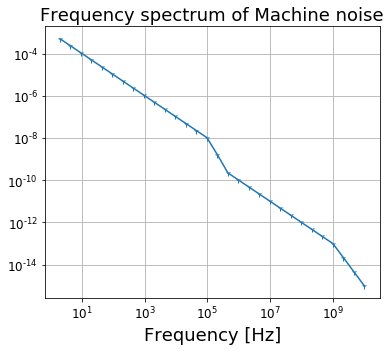

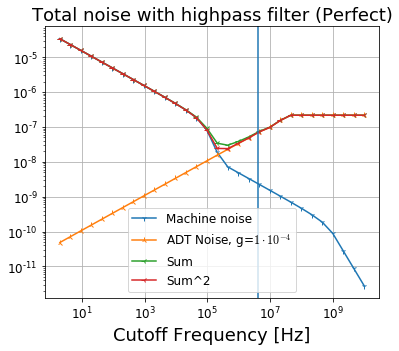

In [6]:

plt.figure()
plt.loglog(freq,coeff,'-1')
plt.title("Frequency spectrum of Machine noise")
plt.xlabel("Frequency [Hz]")
plt.grid(True)




plt.figure()
# plt.loglog(freq,highpasscoeff,'-1') 
G = 0.0001
plt.loglog(freq,machine_undampable,'-1',label="Machine noise") 
plt.loglog(freq,noise_adt(freq,fbunch,G=G),'-2',label='ADT Noise, g=%s'%sci_not(G,0))
plt.loglog(freq,machine_undampable+noise_adt(freq,fbunch,G=G),'-3',label="Sum" )
plt.loglog(freq,np.sqrt(machine_undampable**2+noise_adt(freq,fbunch,G=G)**2),'-3',label="Sum^2" )
# plt.loglog(freq,machine_dampable,'-1',label="Machine dampable noise")
plt.legend(loc=0)
plt.axvline(x=freq_standard)
plt.title("Total noise with highpass filter (Perfect)")
plt.xlabel("Cutoff Frequency [Hz]");
plt.grid(True)
plt.savefig("00_Plots/NoiseWithHP_g%.0e.eps"%G)


In [7]:
print(machine_undampable)
print(d_0-machine_dampable)

[  3.39408871e-05   2.30938199e-05   1.57131764e-05   1.06911088e-05
   7.27379569e-06   4.94829224e-06   3.36553590e-06   2.28795121e-06
   1.55378792e-06   1.05283766e-06   7.09877348e-07   4.73330182e-07
   3.07348988e-07   1.85668256e-07   8.18462911e-08   1.85394065e-08
   7.16280566e-09   4.87286194e-09   3.31434313e-09   2.25331205e-09
   1.53050367e-09   1.03741556e-09   7.00009841e-10   4.67560536e-10
   3.04897354e-10   1.86520837e-10   8.86452223e-11   2.79269068e-11
   8.79735106e-12   2.77128386e-12]
[  1.40589275e-05   5.92087037e-06   2.64503765e-06   1.20602381e-06
   5.54581973e-07   2.55993958e-07   1.18387121e-07   5.48128886e-08
   2.54082853e-08   1.18007444e-08   5.50195371e-09   2.58584875e-09
   1.23558645e-09   6.10195924e-10   3.20370016e-10   2.53623422e-10
   2.49993708e-10   2.49087300e-10   2.48299580e-10   2.47547759e-10
   2.46793199e-10   2.46018482e-10   2.45215224e-10   2.44379670e-10
   2.43510118e-10   2.42605777e-10   2.41665766e-10   2.40690860e-1

5.74470559282e-18
5.79548803772e-15
5.74470559282e-18
5.79548803772e-15


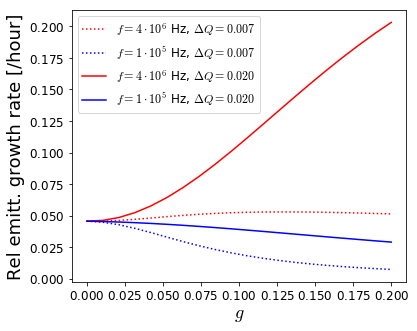

In [9]:
def lebfac(dq,g):
    a = pi2**2*(1-g/2)*dq**2
    return a*(1-g/2)/(a+(g/2)**2)


# New figure

n = 20
tot_noise = np.zeros(n)
Gs = np.linspace(0,.2,n)
plt.figure()
for jq,dq in enumerate([0.007,0.02]):
    for jf,f in enumerate([freq_standard,1e5]):
        for i,G in enumerate(Gs):
            if bool_squared:
                val0 = np.sqrt(integrate_log(noise_mach_n2,f,1e30,10000,args=MACH_NOISE_FAC)) # what cannot be damped
                val1 = np.sqrt(integrate_log(noise_mach_n2,1,f,10000,args=MACH_NOISE_FAC))  # what can be damped
            else:
                val0 = integrate_log(noise_mach_n,f,1e30,10000,args=MACH_NOISE_FAC) # what cannot be damped
                val1 = integrate_log(noise_mach_n2,1,f,1000,args=MACH_NOISE_FAC)    # what can be damped
            val2 = noise_adt(f,G=G)
    #         print(val0,val1,val2,val0**2+val1**2,val2**2)
#             print(val0,val1,val0**2+val1**2,val2,lebfac(dq,G))
            tot_noise[i] = val0**2 + (val1**2 + val2**2) * lebfac(dq,G)
        plt.plot(Gs,tot_noise*11000*3600*0.5,ls=[':','-','--'][jq],c=['r','b'][jf],label=r"$f=$%s Hz, $\Delta Q=%.3f$"%(sci_not(f,0),dq))
plt.legend(loc=0)
plt.ylabel("Rel emitt. growth rate [/hour]")
plt.xlabel(r'$g$')
# plt.ylim(0,0.07)
plt.savefig("00_Plots/NoiseWithHP_Emitgrowth2.png")


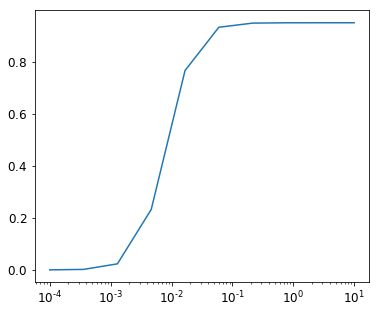

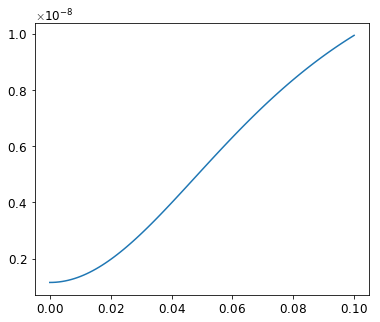

In [11]:
# Lebedev study
plt.figure()
x= np.logspace(-4,1,10)
plt.semilogx(x,lebfac(x,0.1))
plt.figure()
G = np.linspace(0,0.1,100)
plt.plot(G,0.5*(d_0**2+G**2*d_bpm**2)*lebfac(0.007,G))



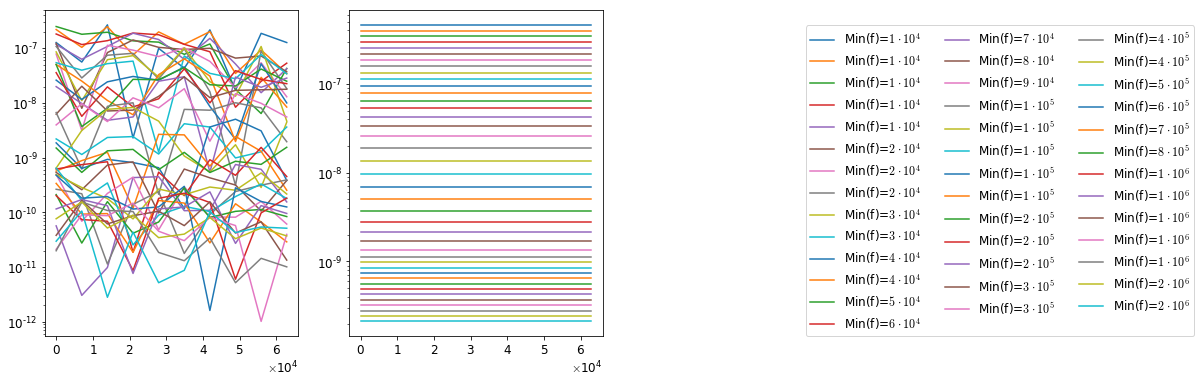

In [22]:
# How does the noise look like? (perhaps)
times = np.linspace(0,pi2*1e4,10)
ones = np.ones_like(times)
wt2d = np.outer(freq,times)
phi2d = np.outer(np.random.uniform(0,pi2,n),ones)
sinp2d= np.sin(wt2d+phi2d)
ones2d= np.ones_like(sinp2d)
coeff2d=np.outer(coeff,ones)


fig= plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in range(min(n,40)):
#     print(np.sum(coeff[i:]))#*np.sin(freq[:i]+np.random.uniform(0,pi2,i))))
#     print(np.sin(np.outer(freq[i:],times)).shape)
#     print(np.sum(np.sin(wt2d),axis=0).shape)
#     print(times.shape)
#     plt.plot(times,np.sum(np.outer(coeff[i:],ones)*\
#                           np.sin(np.random.uniform(0,pi2,n-1) + ,axis=0)\
    p = ax1.semilogy(times,np.abs(np.sum(coeff2d[i:,:]*sinp2d[i:,:],axis=0)),\
                          label="Min(f)=%s"%(sci_not(freq[i],0)))
    ax2.semilogy(times,2/pi*np.sum(coeff2d[i:,:]*ones2d[i:,:],axis=0),c=p[0].get_color())
    
ax1.legend(loc=(3,0),ncol=3)

0.707106781187
0.342301569915
0.381386820122
0.249179852265
0.502010862603
0.743054434962
0.646106770027
0.808787215958
0.802367380855
0.936972020375
0.848757181453
0.728448639652
0.782304502565
0.627397039699
0.522480256846
0.335673904813
0.38453211612
0.294574301357
0.318141183836
0.252397284182
0.130134883324
0.209121661021
0.275913364772
0.178881734839
0.316669682715
0.448838412713
0.495675244978
0.555948077661
0.424398501299
0.451413727752
0.317672777569
0.426361475153
0.418941142943
0.504255920915
0.611452287268
0.641558103868
0.661112072715
0.541664351846
0.627207093752
0.611005612437
0.713870978676
0.751296642197
0.843037250012
0.922329417924
0.846752314438
0.914950861854
0.903632855078
0.971877589375
1.0583378993
1.07475345253
1.10486767564
1.13780426772
1.18089120332
1.17345093301
1.24132181292
1.20404353413
1.20089586375
1.19523741806
1.25492644831
1.22865783788
1.14753943435
1.10829557378
1.01089513555
1.09073687916
1.02771695412
1.09763707627
1.03922028715
1.06115314586
1.

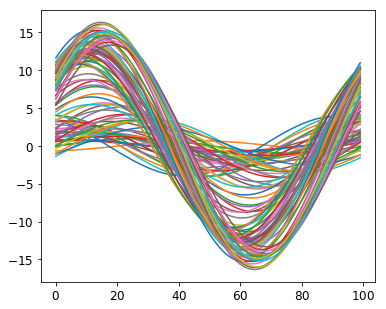

In [185]:
numt= 10
n=100
x = np.zeros(n)
y = np.linspace(0,pi2,n,endpoint=False)
plt.figure()
for i in range(n):
    x+= np.sin(y + np.random.uniform(0,pi2))
    print(np.std(x) /np.sqrt(i+1))
    plt.plot(x)